# 2023/2024 NBA Season Analysis & MVP Prediction

## 1. Introduction
The goal of this project is to analyze the 2023-2024 NBA regular season statistics to identify high-scoring players for the upcoming fantasy season. By examining key statistical categories such as average points, rebounds, assists, steals, blocks, and three-pointers made, we aim to gain valuable insights into the league's top performers and make informed drafting decisions.

Additionally, this analysis will also involve a comprehensive evaluation of MVP candidates to determine the most deserving players based on their individual performance and contributions to their team's success using machine learning.

Link to player performance dataset: <a href="https://www.kaggle.com/datasets/vivovinco/2023-2024-nba-player-stats">https://www.kaggle.com/datasets/vivovinco/2023-2024-nba-player-stats</a>. This contains the following information:

* **Rk:** Rank
* **Player:** Player's name
* **Pos:** Position
* **Age:** Player's age
* **Tm:** Team
* **G:** Games played
* **GS:** Games started
* **MP:** Minutes played per game
* **FG:** Field goals per game
* **FGA:** Field goal attempts per game
* **FG%:** Field goal percentage
* **3P:** 3-point field goals per game
* **3PA:** 3-point field goal attempts per game
* **3P%:** 3-point field goal percentage
* **2P:** 2-point field goals per game
* **2PA:** 2-point field goal attempts per game
* **2P%:** 2-point field goal percentage
* **eFG%:** Effective field goal percentage
* **FT:** Free throws per game
* **FTA:** Free throw attempts per game
* **FT%:** Free throw percentage
* **ORB:** Offensive rebounds per game
* **DRB:** Defensive rebounds per game
* **TRB:** Total rebounds per game
* **AST:** Assists per game
* **STL:** Steals per game
* **BLK:** Blocks per game
* **TOV:** Turnovers per game
* **PF:** Personal fouls per game
* **PTS:** Points per game

Link to team's dataset: <a href="https://github.com/wlshepherd/My_Portolio/blob/main/Team%20Performance.csv">https://github.com/wlshepherd/My_Portolio/blob/main/Team%20Performance.csv</a>. This contains the following information:

* **Rk:** Rank
* **Wins:** Number of regular season victories
* **Losses:** Number of regular season losses
* **Coast:** Which conference the team is in (west / east)
* **Full Team Name:** The team name itself

## 2. Implementation
### 2.1. Importing Python Libraries

In [2]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tabulate import tabulate
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

### 2.2 Extracting the Data from both CSV Files

In [3]:
nba_stats = pd.read_csv('regular_season.csv')
nba_team_stats = pd.read_csv('Team Performance.csv')

### 2.3 Cleaning the Data Frames

In [4]:
# Removing ranks from the the players dataset
nba_stats.drop(columns="Rk", inplace=True)

### 2.4 Structure of the Data Frames

In [5]:
# Returning the first 10 rows of the NBA Player stats
nba_stats.head(10)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Precious Achiuwa,PF-C,24,TOT,74,18,21.9,3.2,6.3,0.501,...,0.616,2.6,4.0,6.6,1.3,0.6,0.9,1.1,1.9,7.6
1,Precious Achiuwa,C,24,TOR,25,0,17.5,3.1,6.8,0.459,...,0.571,2.0,3.4,5.4,1.8,0.6,0.5,1.2,1.6,7.7
2,Precious Achiuwa,PF,24,NYK,49,18,24.2,3.2,6.1,0.525,...,0.643,2.9,4.3,7.2,1.1,0.6,1.1,1.1,2.1,7.6
3,Bam Adebayo,C,26,MIA,71,71,34.0,7.5,14.3,0.521,...,0.755,2.2,8.1,10.4,3.9,1.1,0.9,2.3,2.2,19.3
4,Ochai Agbaji,SG,23,TOT,78,28,21.0,2.3,5.6,0.411,...,0.661,0.9,1.8,2.8,1.1,0.6,0.6,0.8,1.5,5.8
5,Ochai Agbaji,SG,23,UTA,51,10,19.7,2.1,4.9,0.426,...,0.750,0.7,1.8,2.5,0.9,0.5,0.6,0.7,1.3,5.4
6,Ochai Agbaji,SG,23,TOR,27,18,23.6,2.7,6.8,0.391,...,0.611,1.4,1.9,3.3,1.3,0.7,0.6,1.1,1.9,6.7
7,Santi Aldama,PF,23,MEM,61,35,26.5,4.0,9.3,0.435,...,0.621,1.2,4.6,5.8,2.3,0.7,0.9,1.1,1.5,10.7
8,Nickeil Alexander-Walker,SG,25,MIN,82,20,23.4,2.9,6.6,0.439,...,0.800,0.4,1.6,2.0,2.5,0.8,0.5,0.9,1.7,8.0
9,Grayson Allen,SG,28,PHO,75,74,33.5,4.5,9.1,0.499,...,0.878,0.6,3.3,3.9,3.0,0.9,0.6,1.3,2.1,13.5


In [6]:
# Returning the first 10 rows of the NBA Team stats
nba_team_stats.head(10)

,Tm,Wins,Losses,Coast,Full Team Name,Position
0,PHO,49,33,West,Phoenix Suns,6
1,NYK,50,32,East,New York Knicks,2
2,WAS,15,67,East,Washington Wizards,14
3,MIL,49,33,East,Milwaukee Bucks,3
4,ORL,47,35,East,Orlando Magic,5
5,TOR,25,57,East,Toronto Raptors,12
6,MEM,27,55,West,Memphis Grizzlies,13
7,BOS,64,18,East,Boston Celtics,1
8,SAS,22,60,West,San Antonio Spurs,14
9,SAC,46,36,West,Sacramento Kings,9


In [6]:
# Data types of all columns
nba_stats.dtypes

Player     object
Pos        object
Age         int64
Tm         object
G           int64
GS          int64
MP        float64
FG        float64
FGA       float64
FG%       float64
3P        float64
3PA       float64
3P%       float64
2P        float64
2PA       float64
2P%       float64
eFG%      float64
FT        float64
FTA       float64
FT%       float64
ORB       float64
DRB       float64
TRB       float64
AST       float64
STL       float64
BLK       float64
TOV       float64
PF        float64
PTS       float64
dtype: object

In [7]:
# Data types of all columns
nba_team_stats.dtypes

Tm                object
Wins               int64
Losses             int64
Coast             object
Full Team Name    object
Position           int64
dtype: object

### 2.5 NBA Regular Season Table

In [8]:
eastern_teams = nba_team_stats[nba_team_stats['Coast'] == 'East']
western_teams = nba_team_stats[nba_team_stats['Coast'] == 'West']

eastern_teams_sorted = eastern_teams.sort_values(by='Position', ascending=True)
western_teams_sorted = western_teams.sort_values(by='Position', ascending=True)

east_table = tabulate(eastern_teams_sorted[['Position', 'Full Team Name', 'Wins', 'Losses']], headers='keys', tablefmt='pretty')
print("Eastern Conference Table (2023/2024 Regular Season)")
print(east_table)
print("")

west_table = tabulate(western_teams_sorted[['Position', 'Full Team Name', 'Wins', 'Losses']], headers='keys', tablefmt='pretty')
print("Western Conference Table (2023/2024 Regular Season)")
print(west_table)

Eastern Conference Table (2023/2024 Regular Season)
+----+----------+---------------------+------+--------+
|    | Position |   Full Team Name    | Wins | Losses |
+----+----------+---------------------+------+--------+
| 7  |    1     |   Boston Celtics    |  64  |   18   |
| 1  |    2     |   New York Knicks   |  50  |   32   |
| 3  |    3     |   Milwaukee Bucks   |  49  |   33   |
| 24 |    4     | Cleveland Cavaliers |  48  |   34   |
| 4  |    5     |    Orlando Magic    |  47  |   35   |
| 14 |    6     | Indianapolis Pacers |  47  |   35   |
| 22 |    7     | Philadelphia 76ers  |  47  |   35   |
| 13 |    8     |     Miami Heat      |  46  |   36   |
| 15 |    9     |    Chicago Bulls    |  39  |   43   |
| 10 |    10    |    Atlanta Hawks    |  36  |   46   |
| 12 |    11    |    Brooklyn Nets    |  32  |   50   |
| 5  |    12    |   Toronto Raptors   |  25  |   57   |
| 25 |    13    |  Charlotte Hornets  |  21  |   61   |
| 2  |    14    | Washington Wizards  |  15  |   67 

### 2.6 NBA 2023/2024 Season Analysis
#### 2.6.1 Top 10 Players by Average Points Scored per Game

C:\Users\wills\AppData\Local\Temp\ipykernel_29408\3039183084.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=names, y=average_points, palette=colors, edgecolor='white')


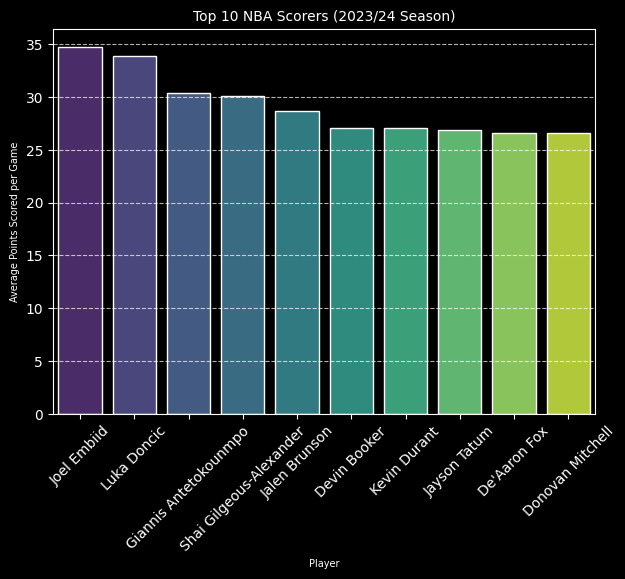

In [8]:
# Fetching the top 10 players by average points per game
top_scorers = nba_stats.nlargest(10, 'PTS')

# Getting the names and average points of the 'top_scorers'
names = top_scorers['Player']
average_points = top_scorers['PTS']

# Setting the dimensions of the graph
plt.figure(figsize=(7, 5))

# Creating a bar chart using the Seaborn library, X axis contains player names, Y axis contains the average points scored per game
colors = sns.color_palette("viridis", n_colors=10)
sns.barplot(x=names, y=average_points, palette=colors, edgecolor='white')

# Labelling and customising the graph
plt.title('Top 10 NBA Scorers (2023/24 Season)', fontsize=10)
plt.xlabel('Player', fontsize=7)
plt.ylabel('Average Points Scored per Game', fontsize=7)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.style.use('dark_background')
plt.show()

#### 2.6.2 Top 10 Players by Average Assists per Game

C:\Users\wills\AppData\Local\Temp\ipykernel_29408\2620098378.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=names, y=average_assists, palette=colors, edgecolor='white')


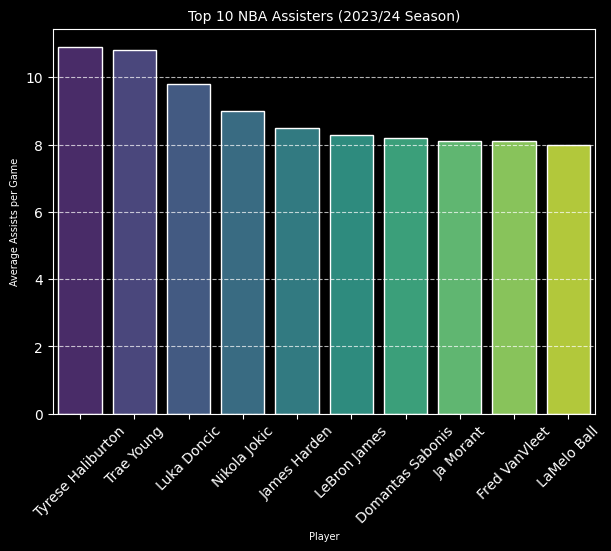

In [9]:
# Fetching the top 10 players by average assists per game
top_assisters = nba_stats.nlargest(10, 'AST')

# Getting the names and average points of the 'top_assisters'
names = top_assisters['Player']
average_assists = top_assisters['AST']

# Setting the dimensions of the graph
plt.figure(figsize=(7, 5))

# Creating a bar chart using the Seaborn library
colors = sns.color_palette("viridis", n_colors=10)
sns.barplot(x=names, y=average_assists, palette=colors, edgecolor='white')

# Labelling and customising the graph
plt.title('Top 10 NBA Assisters (2023/24 Season)', fontsize=10)
plt.xlabel('Player', fontsize=7)
plt.ylabel('Average Assists per Game', fontsize=7)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.style.use('dark_background')
plt.show()

#### 2.6.3 Top 10 Players by Average Rebounds per Game

C:\Users\wills\AppData\Local\Temp\ipykernel_29408\2916238794.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=names, y=average_rebounds, palette=colors, edgecolor='white')


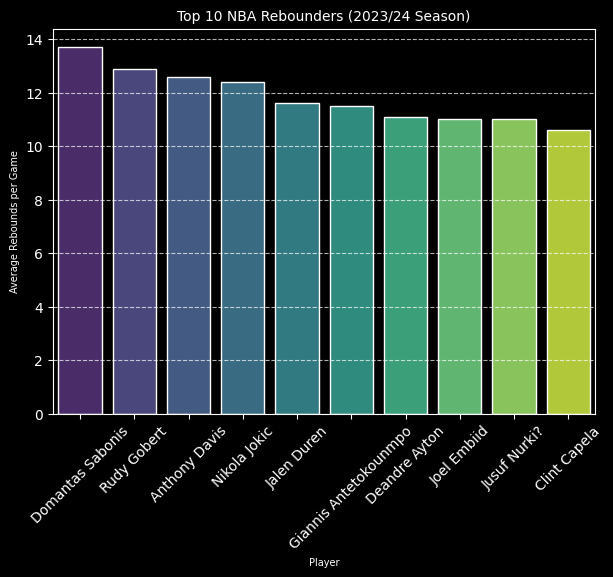

In [10]:
# Fetching the top 10 players by average rebounds per game
top_rebounders = nba_stats.nlargest(10, 'TRB')

# Getting the names and average points of the 'top_rebounders'
names = top_rebounders['Player']
average_rebounds = top_rebounders['TRB']

# Setting the dimensions of the graph
plt.figure(figsize=(7, 5))

# Creating a bar chart using the Seaborn library
colors = sns.color_palette("viridis", n_colors=10)
sns.barplot(x=names, y=average_rebounds, palette=colors, edgecolor='white')

# Labelling and customising the graph
plt.title('Top 10 NBA Rebounders (2023/24 Season)', fontsize=10)
plt.xlabel('Player', fontsize=7)
plt.ylabel('Average Rebounds per Game', fontsize=7)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.style.use('dark_background')
plt.show()

#### 2.6.4 Top 10 Players by Average Steals per Game

C:\Users\wills\AppData\Local\Temp\ipykernel_29408\2373764293.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=names, y=average_steals, palette=colors, edgecolor='white')


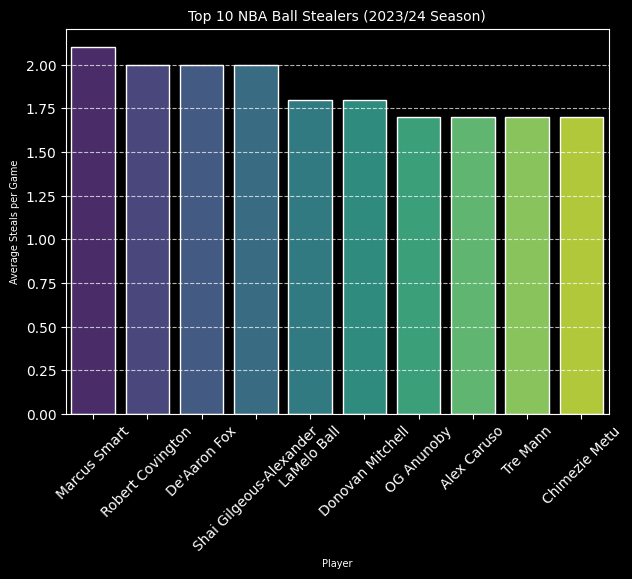

In [11]:
# Fetching the top 10 players by average steals per game
top_steals = nba_stats.nlargest(10, 'STL')

# Getting the names and average points of the 'top_steals'
names = top_steals['Player']
average_steals = top_steals['STL']

# Setting the dimensions of the graph
plt.figure(figsize=(7, 5))

# Creating a bar chart using the Seaborn library
colors = sns.color_palette("viridis", n_colors=10)
sns.barplot(x=names, y=average_steals, palette=colors, edgecolor='white')

# Labelling and customising the graph
plt.title('Top 10 NBA Ball Stealers (2023/24 Season)', fontsize=10)
plt.xlabel('Player', fontsize=7)
plt.ylabel('Average Steals per Game', fontsize=7)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.style.use('dark_background')
plt.show()

#### 2.6.5 Top 10 Players by Average 2-Point Field Goals per Game

C:\Users\wills\AppData\Local\Temp\ipykernel_29408\1981637694.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=names, y=average_2PFG, palette=colors, edgecolor='white')


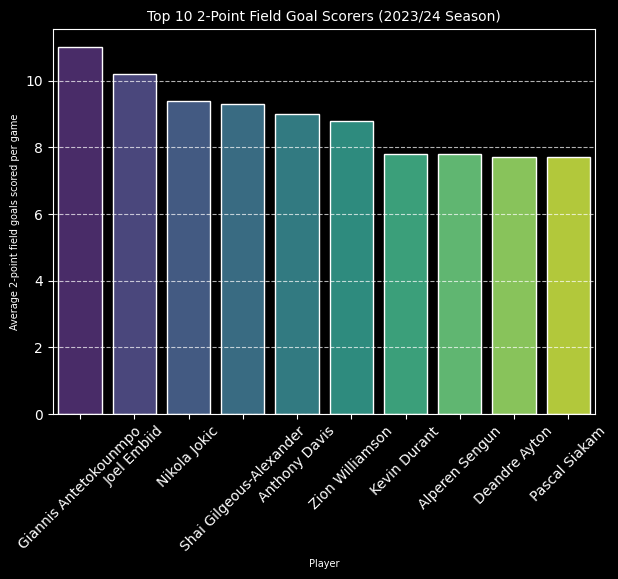

In [12]:
# Fetching the top 10 players by average 2-point field goals scored per game
top_2PFG = nba_stats.nlargest(10, '2P')

# Getting the names and average points of the 'top_2PFG'
names = top_2PFG['Player']
average_2PFG = top_2PFG['2P']

# Setting the dimensions of the graph
plt.figure(figsize=(7, 5))

# Creating a bar chart using the Seaborn library
colors = sns.color_palette("viridis", n_colors=10)
sns.barplot(x=names, y=average_2PFG, palette=colors, edgecolor='white')

# Labelling and customising the graph
plt.title('Top 10 2-Point Field Goal Scorers (2023/24 Season)', fontsize=10)
plt.xlabel('Player', fontsize=7)
plt.ylabel('Average 2-point field goals scored per game', fontsize=7)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.style.use('dark_background')
plt.show()

#### 2.6.6 Top 10 Players by Average 3-Point Field Goals per Game

C:\Users\wills\AppData\Local\Temp\ipykernel_29408\1336748313.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=names, y=average_3PFG, palette=colors, edgecolor='white')


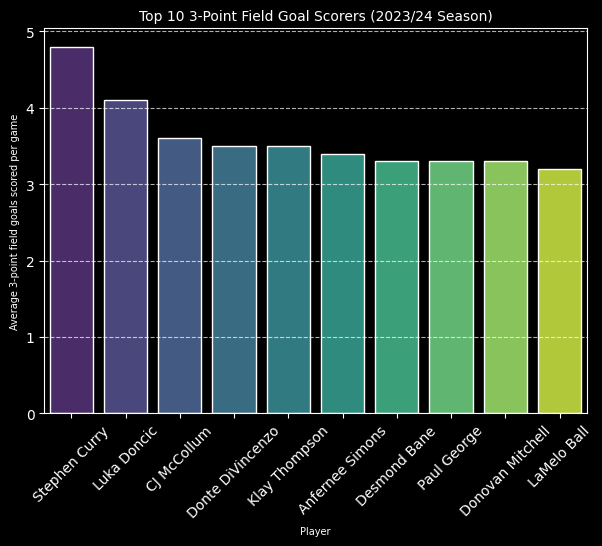

In [13]:
# Fetching the top 10 players by average 3-point field goals scored per game
top_3PFG = nba_stats.nlargest(10, '3P')

# Getting the names and average points of the 'top_3PFG'
names = top_3PFG['Player']
average_3PFG = top_3PFG['3P']

# Setting the dimensions of the graph
plt.figure(figsize=(7, 5))

# Creating a bar chart using the Seaborn library
colors = sns.color_palette("viridis", n_colors=10)
sns.barplot(x=names, y=average_3PFG, palette=colors, edgecolor='white')

# Labelling and customising the graph
plt.title('Top 10 3-Point Field Goal Scorers (2023/24 Season)', fontsize=10)
plt.xlabel('Player', fontsize=7)
plt.ylabel('Average 3-point field goals scored per game', fontsize=7)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.style.use('dark_background')
plt.show()

#### 2.6.7 NBA Player Age Distribution

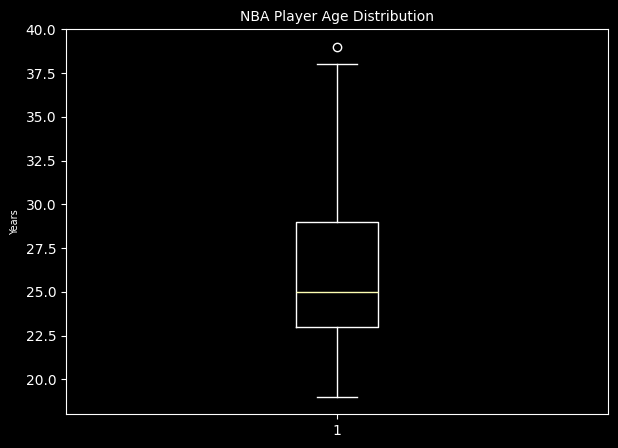

In [14]:
# Fetching the ages of all NBA players
ages = nba_stats['Age']

# Setting the dimensions of the graph
plt.figure(figsize=(7, 5))

# Labelling and customising the graph
plt.boxplot(ages)
plt.title('NBA Player Age Distribution', fontsize=10)
plt.ylabel('Years', fontsize=7)
plt.style.use('dark_background')
plt.show()

#### 2.6.8 Top 10 Teams by Average Points Scored per Player

C:\Users\wills\AppData\Local\Temp\ipykernel_29408\998453821.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_teams.index, y=top_10_teams.values, palette=colors, edgecolor='white')


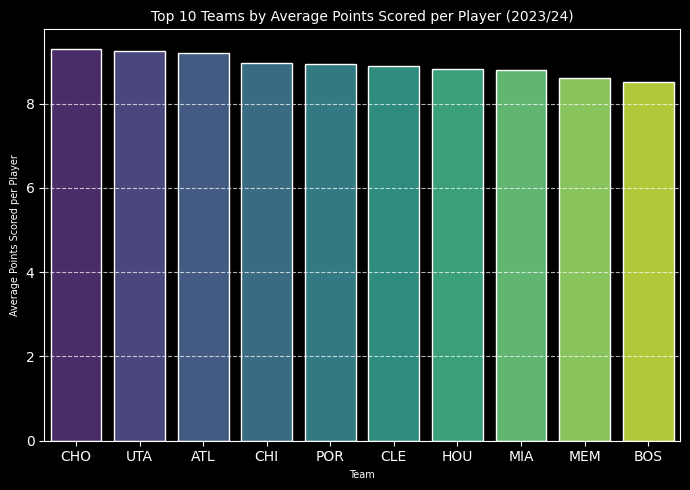

In [15]:
# Calculating the mean points scored per game for each NBA team
team_performance_pts = nba_stats.groupby('Tm')['PTS'].mean()

# Fetching the top 10 teams
top_10_teams = team_performance_pts.head(10)

# Sorting from highest to lowest
top_10_teams = team_performance_pts.sort_values(ascending=False).head(10)

# Setting the dimensions of the graph
plt.figure(figsize=(7, 5))

# Creating a bar chart using the Seaborn library
colors = sns.color_palette("viridis", n_colors=10)
sns.barplot(x=top_10_teams.index, y=top_10_teams.values, palette=colors, edgecolor='white')

# Labelling and customising the graph
plt.title('Top 10 Teams by Average Points Scored per Player (2023/24)', fontsize=10)
plt.xlabel('Team', fontsize=7)
plt.ylabel('Average Points Scored per Player',  fontsize=7)
plt.xticks()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.style.use('dark_background') 
plt.tight_layout()
plt.show()

#### 2.6.9 All NBA Players (Average Points Scored vs Average 3-Point Field Goals Scored per Game)

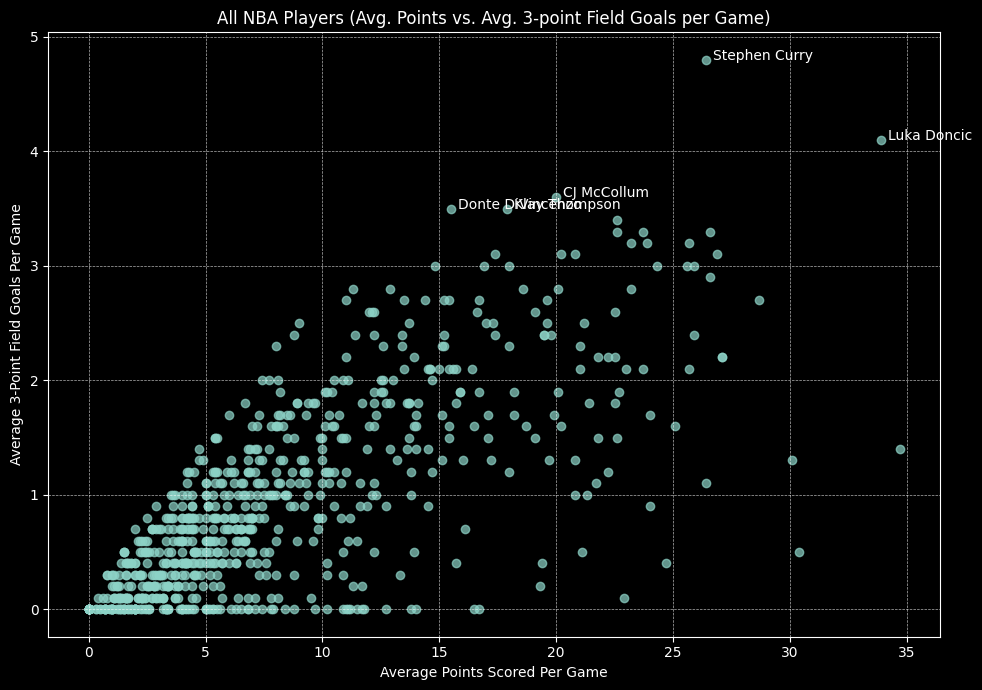

In [16]:
# Fetching the top 5 players with the highest Avg. 3-point Field Goals made per Game
most_3ps = nba_stats.nlargest(5, '3P')

# Setting the dimensions of the graph
plt.figure(figsize=(10, 7))

# Plotting all players in the NBA onto the graph
plt.scatter(nba_stats['PTS'], nba_stats['3P'], alpha=0.7)

# Fetching the names of players contained in 'most_3ps'
for index, row in most_3ps.iterrows():
    plt.annotate(row['Player'], (row['PTS'], row['3P']), textcoords="offset points", xytext=(5, 0), color='white')

# Labelling and customising the graph
plt.title('All NBA Players (Avg. Points vs. Avg. 3-point Field Goals per Game)', fontsize=12)
plt.xlabel('Average Points Scored Per Game', fontsize=10)
plt.ylabel('Average 3-Point Field Goals Per Game', fontsize=10)
plt.grid(True, linestyle='--', linewidth=0.5, color='white', alpha=0.7)
plt.style.use('dark_background')
plt.tight_layout()
plt.show()

#### 2.6.10 All NBA Players (Average Points Scored vs Average Assists per Game)

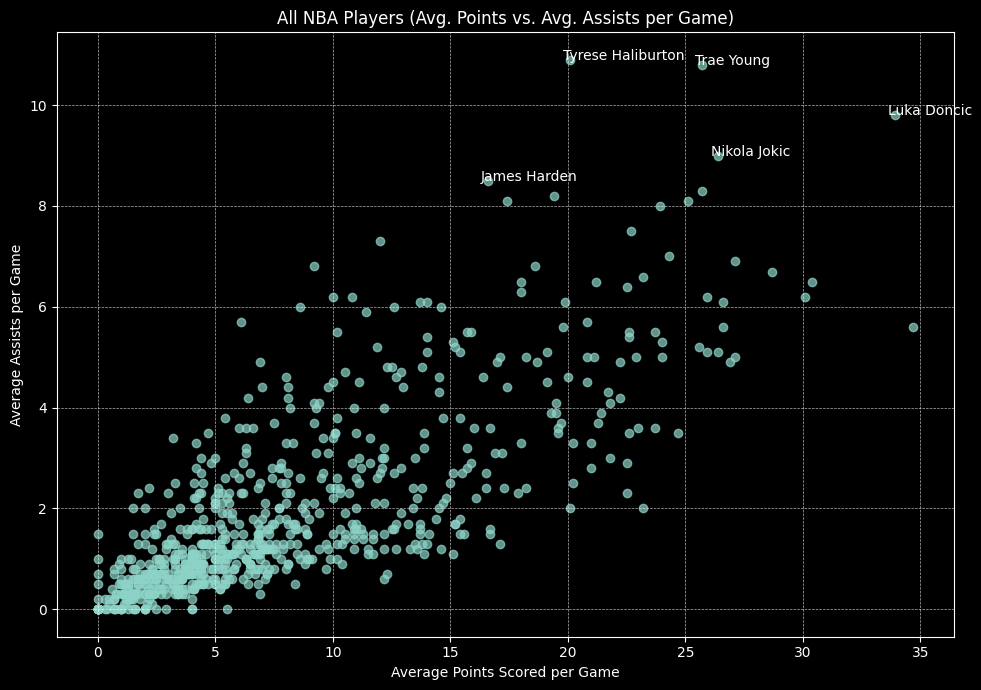

In [17]:
# Fetching the top 5 players with the highest average assists per game
top_assisters = nba_stats.nlargest(5, 'AST')

# Setting the dimensions of the graph
plt.figure(figsize=(10, 7))

# Plotting all players in the NBA onto the graph
plt.scatter(nba_stats['PTS'], nba_stats['AST'], alpha=0.7)

# Fetching the names of players contained in 'top_assisters'
for index, row in top_assisters.iterrows():
    plt.annotate(row['Player'], (row['PTS'], row['AST']),textcoords="offset points", xytext=(-5, 0), color='white')

# Labelling and customising the graph
plt.title('All NBA Players (Avg. Points vs. Avg. Assists per Game)')
plt.xlabel('Average Points Scored per Game')
plt.ylabel('Average Assists per Game')
plt.grid(True, linestyle='--', linewidth=0.5, color='white', alpha=0.7)
plt.style.use('dark_background')
plt.tight_layout()
plt.show()

#### 2.6.11 Overall Team Performance by Key Performance Indicators

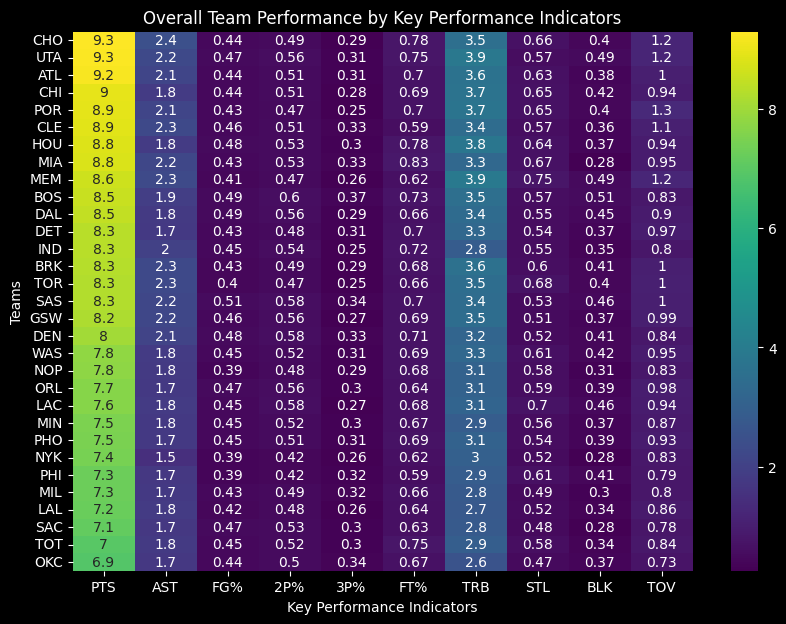

In [18]:
# The key performance indicators
attributes = ['PTS', 'AST', 'FG%', '2P%', '3P%', 'FT%', 'TRB', 'STL', 'BLK','TOV']

# Calculating the means of all performance indicators
organisation= nba_stats[attributes + ['Tm']].groupby('Tm').mean()

# Sorting the teams into order, via points performance
sort = organisation.sort_values(by='PTS', ascending=False)

# Setting the dimensions of the graph
plt.figure(figsize=(10, 7))

# Plotting the heat map
sns.heatmap(organisation.sort_values(by='PTS', ascending=False), annot=True, cmap='viridis')

# Labelling and customising the graph
plt.title('Overall Team Performance by Key Performance Indicators')
plt.xlabel('Key Performance Indicators')
plt.ylabel('Teams')
plt.show()

#### 2.6.12 Overall Player Performance by Age Category

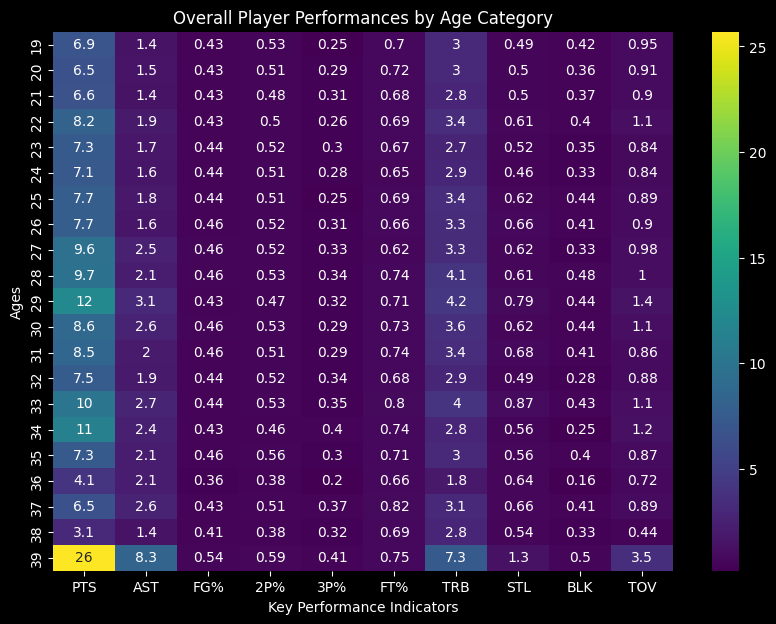

In [64]:
# The key performance indicators
attributes = ['PTS', 'AST', 'FG%', '2P%', '3P%', 'FT%', 'TRB', 'STL', 'BLK','TOV']

# Calculating the means of all performance indicators
organisation= nba_stats[attributes + ['Age']].groupby('Age').mean()

# Setting the dimensions of the graph
plt.figure(figsize=(10, 7))

# Plotting the heat map
sns.heatmap(organisation, annot=True, cmap='viridis')

# Labelling and customising the graph
plt.title('Overall Player Performances by Age Category')
plt.xlabel('Key Performance Indicators')
plt.ylabel('Ages')
plt.show()

#### 2.6.13 Overall Player Performance by Position
##### 2.6.13.1 Point Guard

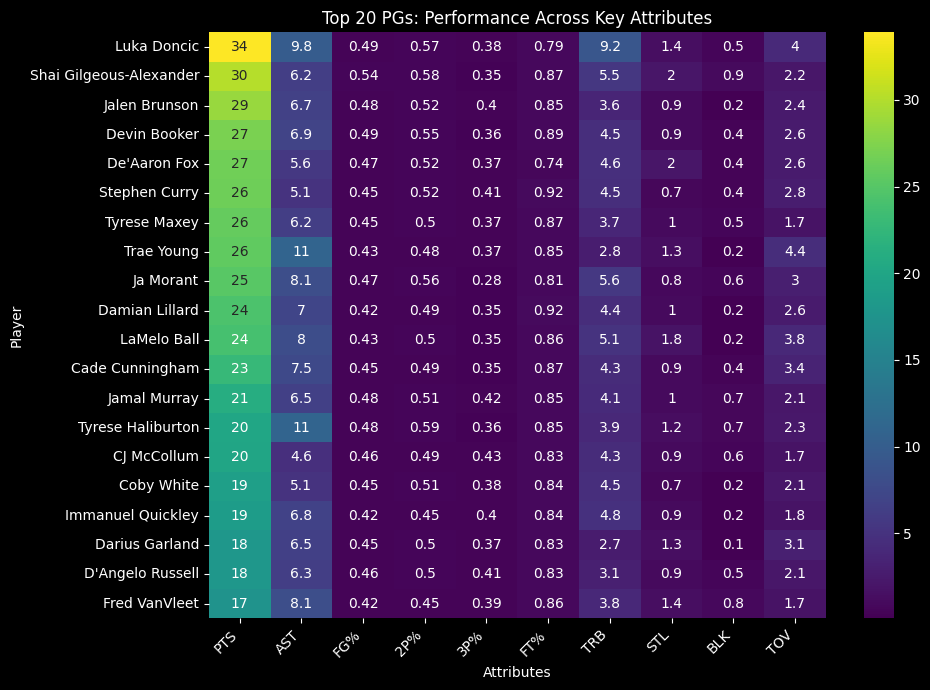

In [77]:
# Filter for top 20 PGs
top_30_pg_stats = (nba_stats[nba_stats['Pos'] == 'PG'].sort_values('PTS', ascending=False).head(20))

# Create a heatmap
plt.figure(figsize=(10, 7))

# Plotting the heat map
sns.heatmap(top_30_pg_stats[attributes], annot=True, cmap='viridis', yticklabels=top_30_pg_stats['Player'])

# Labelling and customization
plt.title('Top 20 PGs: Performance Across Key Attributes')
plt.xlabel('Attributes')
plt.ylabel('Player')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##### 2.6.13.2 Shooting Guard

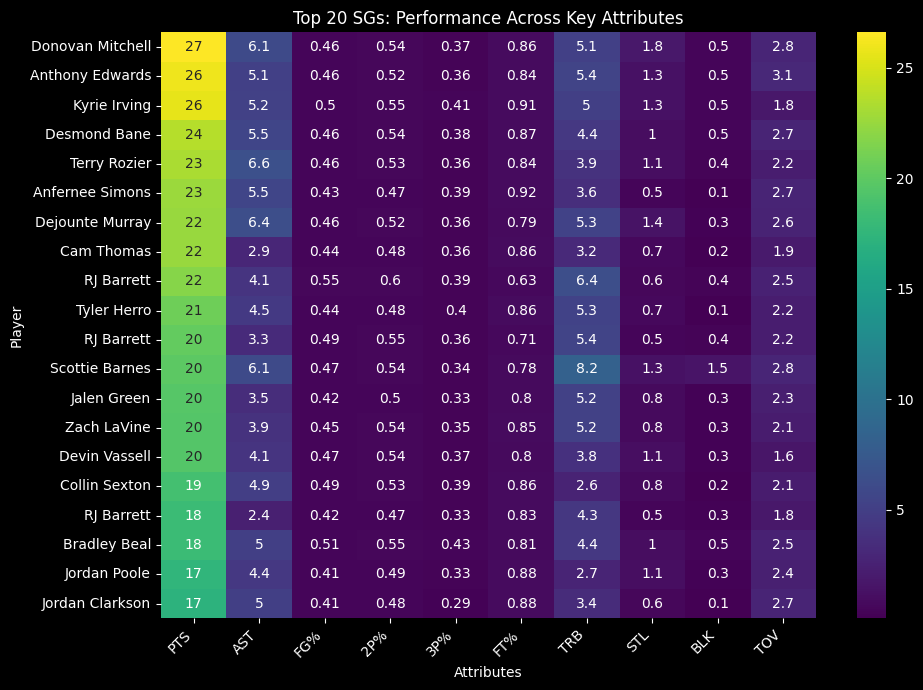

In [78]:
# Filter for top 20 PGs
top_30_sg_stats = (nba_stats[nba_stats['Pos'] == 'SG'].sort_values('PTS', ascending=False).head(20))

# Create a heatmap
plt.figure(figsize=(10, 7))

# Plotting the heat map
sns.heatmap(top_30_sg_stats[attributes], annot=True, cmap='viridis', yticklabels=top_30_sg_stats['Player'])

# Labelling and customization
plt.title('Top 20 SGs: Performance Across Key Attributes')
plt.xlabel('Attributes')
plt.ylabel('Player')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##### 2.6.13.3 Center

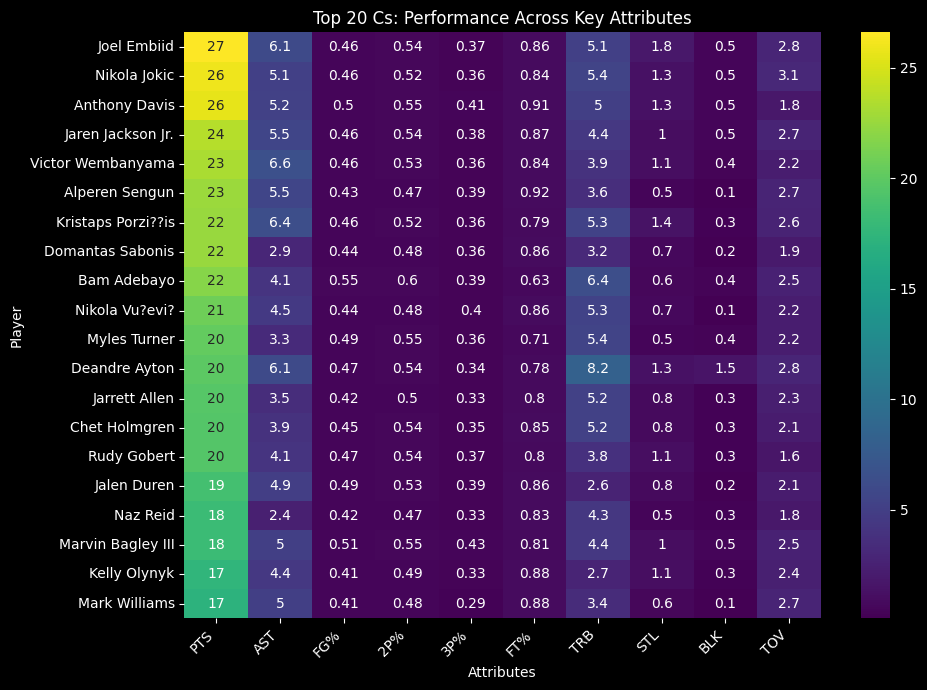

In [86]:
# Filter for top 20 Cs
top_20_c_stats = (nba_stats[nba_stats['Pos'] == 'C'].sort_values('PTS', ascending=False).head(20))

# Create a heatmap
plt.figure(figsize=(10, 7))

# Plotting the heat map
sns.heatmap(top_30_sg_stats[attributes], annot=True, cmap='viridis', yticklabels=top_20_c_stats['Player'])

# Labelling and customization
plt.title('Top 20 Cs: Performance Across Key Attributes')
plt.xlabel('Attributes')
plt.ylabel('Player')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##### 2.6.13.4 Small Forwards

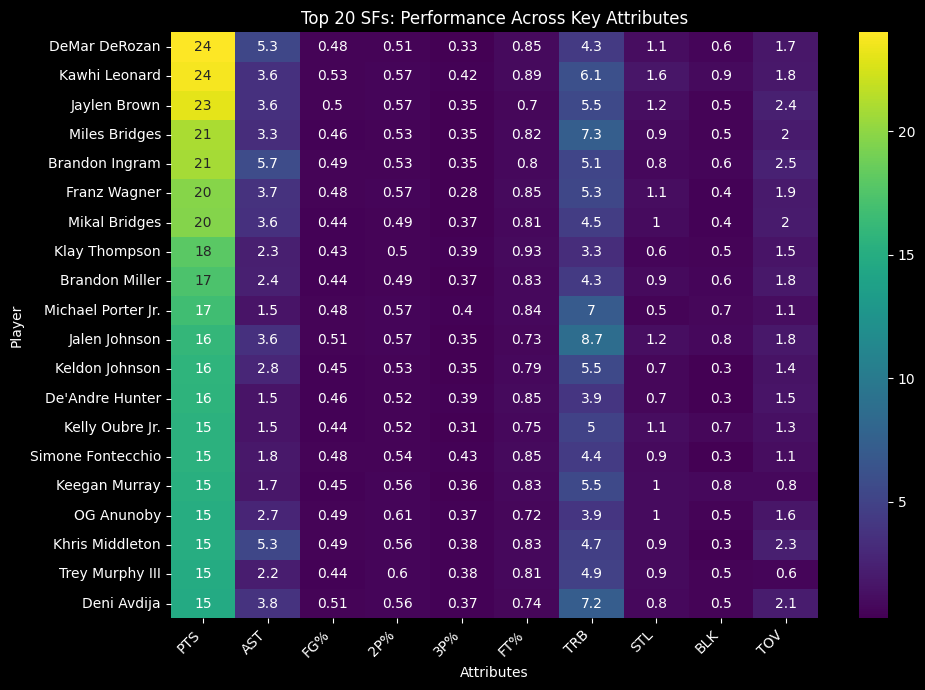

In [85]:
# Filter for top 20 SFs
top_20_sf_stats = (nba_stats[nba_stats['Pos'] == 'SF'].sort_values('PTS', ascending=False).head(20))

# Create a heatmap
plt.figure(figsize=(10, 7))

# Plotting the heat map
sns.heatmap(top_20_sf_stats[attributes], annot=True, cmap='viridis', yticklabels=top_20_sf_stats['Player'])

# Labelling and customization
plt.title('Top 20 SFs: Performance Across Key Attributes')
plt.xlabel('Attributes')
plt.ylabel('Player')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##### 2.6.13.5 Power Forwards

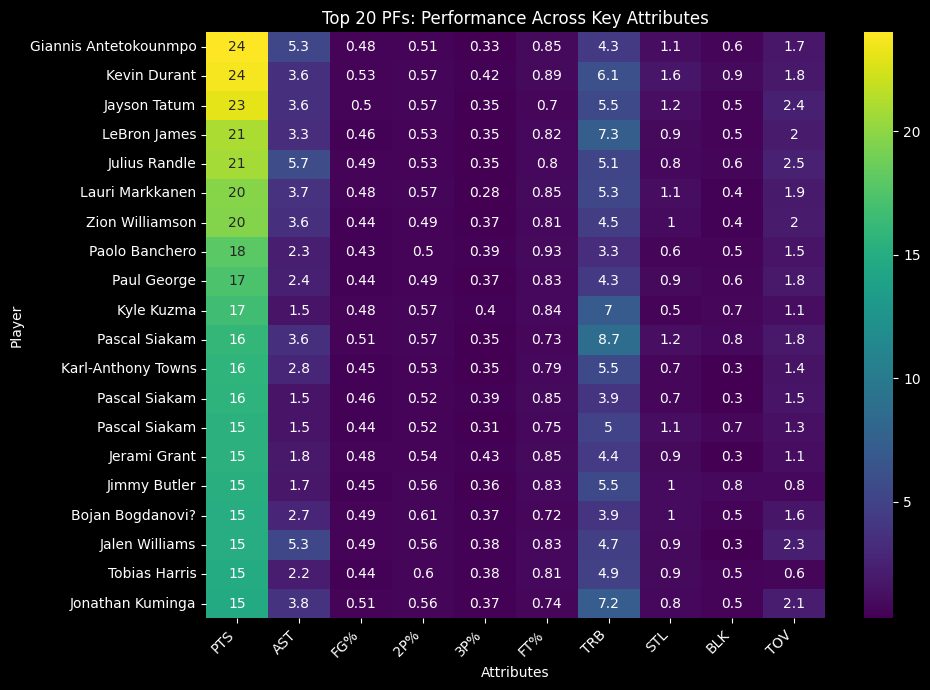

In [87]:
# Filter for top 20 SFs
top_20_pf_stats = (nba_stats[nba_stats['Pos'] == 'PF'].sort_values('PTS', ascending=False).head(20))

# Create a heatmap
plt.figure(figsize=(10, 7))

# Plotting the heat map
sns.heatmap(top_20_sf_stats[attributes], annot=True, cmap='viridis', yticklabels=top_20_pf_stats['Player'])

# Labelling and customization
plt.title('Top 20 PFs: Performance Across Key Attributes')
plt.xlabel('Attributes')
plt.ylabel('Player')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### 2.7 MVP Prediction of the 2023 / 2024 Regular Season
The NBA Most Valuable Player Award (MVP) is an annual award given to the best performing player of the regular season; this award takes into account the player's individual performance, alongside their team's overall success and their overall impact on the league; this is determined by a voting system which includes sportswriters and broadcasters which takes place at the end of the regular season. My code will predict who the MVP will be, only based on individual and team performance, alongside other honourable mentions for the award; thus identifying stand-out stars to draft for the upcoming NBA Fantasy season.

I will be calculating an MVP Score to create a comprehensive metric that reflects a player’s overall contribution to their team’s success, balancing offensive and defensive stats while accounting for efficiency and mistakes. This score will then be used to predict the MVP of the season. In section 1, I will only take into account their individual performance, whilst in the second I will merge the win-rate of their team from my custom CSV file.

In the third sub section, I'll create and train a random forest regressor model to predict MVP scores for all players, and then identify who the MVP award should go to for this year's regular season.
#### 2.7.1 Predicting MVP Candidate by Individual Performance

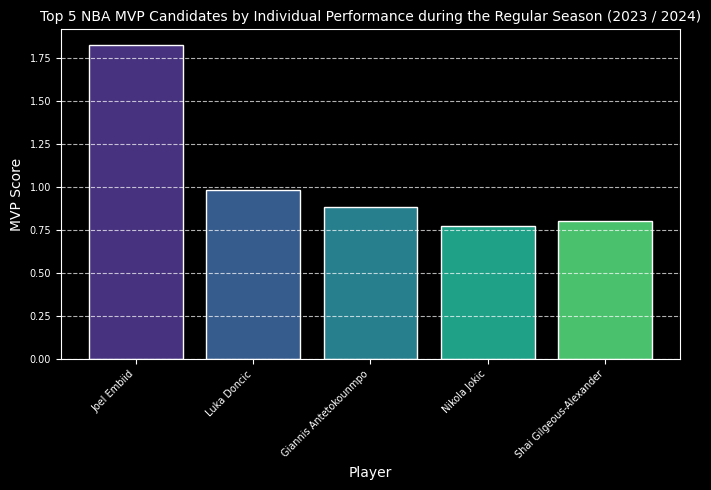

In [31]:
# Calculate MVP Score
nba_stats['MVP_Score'] = (nba_stats['PTS'] + nba_stats['AST'] + nba_stats['ORB'] + nba_stats['DRB'] + 
                          nba_stats['STL'] + nba_stats['BLK'] + nba_stats['2P'] + nba_stats['3P'] + 
                          nba_stats['FT'] + nba_stats['2P%'] + nba_stats['3P%'] + nba_stats['FT%'] - 
                          nba_stats['TOV'] - nba_stats['PF'])

# Fetch the top 5 players in the NBA, ranked by MVP scores
top_candidates = nba_stats.sort_values(by='MVP_Score', ascending=False).head(5)

# Calculate MVP Score per game
top_candidates_per_game = top_candidates.copy()
top_candidates_per_game['MVP_Score'] = top_candidates_per_game['MVP_Score'] / top_candidates_per_game['G']

sns.set_palette("viridis")

# Setting the dimensions of the graph
plt.figure(figsize=(7, 5))

# Creating a bar chart
plt.bar(top_candidates_per_game['Player'], top_candidates_per_game['MVP_Score'], color=sns.color_palette(), linewidth=1, edgecolor='white')

# Labelling and customising the graph
plt.xlabel('Player')
plt.ylabel('MVP Score')
plt.title('Top 5 NBA MVP Candidates by Individual Performance during the Regular Season (2023 / 2024)', fontsize=10)
plt.xticks(rotation=45, ha='right', fontsize=7)
plt.yticks(fontsize=7)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.style.use('dark_background')
plt.tight_layout()
plt.show()

#### 2.7.2 Factoring in Team Performance into the MVP Prediction

In [19]:
# Weightage for wins and losses
win_weightage = 40
loss_weightage = -50  

# Calculating every NBA team's win rate
nba_team_stats['Win_Pct'] = nba_team_stats['Wins'] / (nba_team_stats['Wins'] + nba_team_stats['Losses'])

# Merge both dataframes together
merged_stats = nba_stats.merge(nba_team_stats[['Tm', 'Win_Pct']], how='left', on='Tm')
merged_stats['MVP_Score'] = (merged_stats['PTS'] + merged_stats['AST'] + merged_stats['ORB'] + merged_stats['DRB'] +
                              merged_stats['STL'] + merged_stats['BLK'] + merged_stats['2P'] + merged_stats['3P'] +
                              merged_stats['FT'] + merged_stats['2P%'] + merged_stats['3P%'] + merged_stats['FT%'] -
                              merged_stats['TOV'] - merged_stats['PF'])

# Taking into account the overall team performance into calculating who the MVP of this season will be
merged_stats['MVP_Score'] += (merged_stats['Win_Pct'] * win_weightage) + ((1 - merged_stats['Win_Pct']) * loss_weightage)

# Fetching the top 5 candidates for the season's MVP (not taking into account voting and opinion polling)
top_5_players = merged_stats.sort_values(by='MVP_Score', ascending=False).head(5)

# Printing the top 5 players of the season
print("Top 5 players based on MVP Score:")
for index, row in top_5_players.iterrows():
    print(f"{index + 1}. {row['Player']} - MVP Score: {row['MVP_Score']:.2f}")

Top 5 players based on MVP Score:
341. Nikola Jokic - MVP Score: 73.86
631. Jayson Tatum - MVP Score: 73.69
172. Luka Doncic - MVP Score: 73.62
187. Joel Embiid - MVP Score: 72.71
236. Shai Gilgeous-Alexander - MVP Score: 72.66


#### 2.7.3 Utilising Machine Learning to Predict who should win the MVP Award

In [55]:
# Predicting the season's MVP (2023 / 2024) using Machine Learning

# identifying the indexes of rows that don’t have any missing values
indexes_to_keep = merged_stats.dropna().index 

# Using the following parameters to determine who the MVP of the season is (not considering voting and other advanced metrics)
X = merged_stats[['PTS', 'AST', 'ORB', 'DRB', 'STL', 'BLK', '2P', '3P', 'FT', '2P%', '3P%', 'FT%', 'TOV', 'PF', 'Win_Pct']].loc[indexes_to_keep]
y = merged_stats['MVP_Score'].loc[indexes_to_keep]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=556, random_state=150)

# Create and train Random Forest Regressor model
model = RandomForestRegressor(n_estimators=200, random_state=101)
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error =", mse)
print("R² (coefficient of determination) =", r2) 
print()

# Predict MVP scores for all players
all_predictions = model.predict(merged_stats[['PTS', 'AST', 'ORB', 'DRB', 'STL', 'BLK', '2P', '3P', 'FT', '2P%', '3P%', 'FT%', 'TOV', 'PF', 'Win_Pct']])

# Printing the MVP
player_with_highest_score_index = all_predictions.argmax()
print("Predicted MVP of the 2023 / 2024 Regular Season:", merged_stats.loc[player_with_highest_score_index, 'Player'])

Mean Squared Error = 35.67652217590189
R² (coefficient of determination) = 0.907868854243985

Predicted MVP of the 2023 / 2024 Regular Season: Nikola Jokic


## 3. Conclusion
The calculations and the random forest regressor model in section 2.7 point towards the Serbian superstar Nikola Jokić as the league's most valuable player in the 2023/2024 regular season and if given the first pick during the fantasy, he would be a very solid choice to building a team around him. His individual performance alongside playing for one of the league's most powerful forces, (the Denver Nuggets) is a guarantee for lots of fantasy points. 

The model's performance is quite strong as shown by the MSE score of 35.68 and the R² of 0.9078. The high R² score of 0.9078 suggests that the RF model explains around 90.78% of the variance of the MVP scores, and the MSE score of 35.68 suggests that the model's predictions are decently accurate. Whilst the model takes into account important metrics such as individual statistics and their respective team's wins/loss rates, it dosen't take into account factors such as voter bias which is a major role in determining the final winner; it was still successful in predicting who the season's MVP however.

Based on the results shown in the various graphs, the most overpowered players who fantasy fans should pick early are the European superstars including: Nikola Jokić, Luka Dončić, Giannis Antetokounmpo, Joel Embiid and the recently emerging French rookie superstar Victor Wembanyama. Other honourable mentions include OKC's PG Shai Gilgeous-Alexander who had a phenomenal season, the championship winner Jayson Tatum, Tyrese Haliburton, Anthony Edwards aka the 'next MJ', Anthony Davis and Lithuanian superstar Domantas Sabonis. Although nearing the ends of their NBA career, it would be wise to draft in the 3rd / 4th pick the veterans such as the 39 year old LeBron James, Steph Curry, Kevin Durant and DeMar DeRozan who are still putting up high numbers.
##### *By William Shepherd*
